1.Supervised -> giving some data and training the algorithm
2.Unsupervised -> 
3.Reinfrcementent

In [2]:
K-NN
Hyper-parametres

NameError: name 'K' is not defined

# L2 distance

In [1]:
import numpy as np
a=[1,2,3]
b=[4,5,6]
sum=0
for i in range(len(a)):
    sum+=(a[i]-b[i])**2
sum**0.5


5.196152422706632

In [3]:
x=np.array(a)
y=np.array(b)
(np.sum ((x-y)**2))**0.5

5.196152422706632

# L1 distance(manhattan)

In [4]:
import numpy as np
x=np.array(a)
y=np.array(b)
(np.sum(abs(y-x)))


9

# KNN

In [8]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

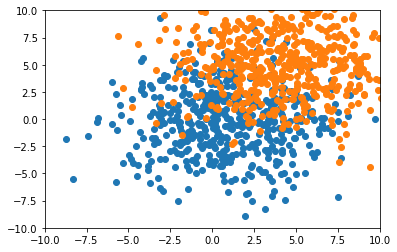

In [6]:
mean1=np.array([1,0])
cov1=([[10,0.1],[0.1,10]])
dist1=np.random.multivariate_normal(mean1,cov1,500)

mean2=np.array([4,5])
cov2=([[10,0.1],[0.1,10]])
dist2=np.random.multivariate_normal(mean2,cov2,500)

plt.scatter(dist1[:,0],dist1[:,1])
plt.scatter(dist2[:,0],dist2[:,1])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

In [7]:
data= np.zeros((1000, 3))
data[:500,:2]=dist1
data[500:,:2]=dist2
data[500:,-1]=1
data.mean(axis=0)#axis=0 column wise

array([2.55092973, 2.49010015, 0.5       ])

In [8]:
np.random.shuffle(data)
data[:10]

array([[ 4.15399191,  2.44349396,  1.        ],
       [ 1.17100243,  6.06242444,  1.        ],
       [ 4.93030923,  5.40588127,  1.        ],
       [-0.16849808,  6.9604965 ,  0.        ],
       [-1.90663022, -0.69208641,  0.        ],
       [-5.30812378,  2.85818448,  1.        ],
       [ 7.44773416,  8.60417474,  1.        ],
       [ 0.82317331, -1.60231096,  0.        ],
       [ 8.62247649,  4.69664261,  1.        ],
       [ 0.1435207 ,  0.48993331,  0.        ]])

In [17]:
def distance(a,b):
    return (np.sum((a-b)**2))**0.5

In [33]:
def KNN(x_train,y_train,test_point,k=7):
    m=x_train.shape[0]#(1000,2)
    vals=[]
    for i in range(m):
        d=distance(x_train[i],test_point)
        vals.append([d,y_train[i]])
    sorted_val=sorted(vals,key=lambda r:r[0])
    neighbours=np.asarray(sorted_val)[:k,-1]#(7,)
    freq=np.unique(neighbours,return_counts=True)
    index=freq[1].argmax()
    return freq[0][index]
        
    

In [1]:
x_train=data[:,:2]
y_train=data[:,-1]
test_point=np.array([6,6])
KNN(x_train,y_train,test_point)

NameError: name 'data' is not defined

In [12]:
np.random.shuffle(data)
m=data.shape[0]
split=int(0.75*m)
x_train=data[:split,:2]
y_train=data[:split,-1]

x_test=data[split:,:2]
y_test=data[split:,-1]
print(x_train.shape,y_train.shape)


(750, 2) (750,)


In [12]:
x_train = [[0., 0.], [1., 1.], [0., 1.],  [1., 0.]]
x_train=np.asarray(x_train)
y_train = [0, 0, 1, 1]
y_train=np.asarray(y_train)
x_test = [[0., 0.], [1., 1.], [0., 1.],  [1., 0.]]
x_test=np.asarray(x_test)
y_test = [0, 0, 1, 1]
y_test=np.asarray(y_test)

In [23]:
def acc(k):
    predictions=[]
    for i in range(x_test.shape[0]):
        test_point=x_test[i]
        predicted=KNN(x_train,y_train,test_point,k)
        print(test_point," ",predicted)
        predictions.append(predicted)
   # print(predictions==y_test)
    print(predictions)
    print(y_test)
    matches=(np.array(predictions)==y_test).sum()
    print(matches)
    return((matches*100)/x_test.shape[0])

In [34]:
acc(4)

[2 2]
[0. 0.]   0.0
[2 2]
[1. 1.]   0.0
[2 2]
[0. 1.]   0.0
[2 2]
[1. 0.]   0.0
[0.0, 0.0, 0.0, 0.0]
[0 0 1 1]
2


50.0

In [14]:
for k in range(1,51):
    print(f"For k={k} Accuuracy={acc(k)}")
    

For k=1 Accuuracy=78.4
For k=2 Accuuracy=76.0
For k=3 Accuuracy=78.4
For k=4 Accuuracy=78.4
For k=5 Accuuracy=81.6
For k=6 Accuuracy=79.2
For k=7 Accuuracy=81.2
For k=8 Accuuracy=80.8
For k=9 Accuuracy=82.0
For k=10 Accuuracy=81.6
For k=11 Accuuracy=82.4
For k=12 Accuuracy=83.2
For k=13 Accuuracy=82.8
For k=14 Accuuracy=84.0
For k=15 Accuuracy=84.0
For k=16 Accuuracy=84.0
For k=17 Accuuracy=84.8
For k=18 Accuuracy=84.4
For k=19 Accuuracy=84.4
For k=20 Accuuracy=84.4
For k=21 Accuuracy=84.0
For k=22 Accuuracy=84.0
For k=23 Accuuracy=84.4
For k=24 Accuuracy=84.4
For k=25 Accuuracy=84.4
For k=26 Accuuracy=84.0
For k=27 Accuuracy=84.0
For k=28 Accuuracy=84.0
For k=29 Accuuracy=83.6
For k=30 Accuuracy=83.6
For k=31 Accuuracy=84.0
For k=32 Accuuracy=84.4
For k=33 Accuuracy=83.6
For k=34 Accuuracy=83.6
For k=35 Accuuracy=83.6
For k=36 Accuuracy=84.0
For k=37 Accuuracy=83.6
For k=38 Accuuracy=84.0
For k=39 Accuuracy=84.4
For k=40 Accuuracy=84.4
For k=41 Accuuracy=83.6
For k=42 Accuuracy=84.0
F

Implention through sklearn

In [15]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [16]:
neigh=KNeighborsClassifier(n_neighbors=200)
neigh.fit(x_train,y_train)
print(neigh.score(x_test,y_test))

0.844


Above type of algortihm is called instance based algorithm
Instance based algo vs Parametric algorithms

# homwork

In [17]:
#1
l1=[]
for k in range(1,51):
    l1.append(acc(k))
arr=np.asarray(l1)
print(np.amax(arr))
    

84.8


In [18]:
#2
k=np.array(l1)
kl=acc(k[0])
ku=acc(k[1])
km=acc(50)
if(abs(km-kl)>abs(ku-km)):
    print("1-50")
else:
    print("50-100")

TypeError: slice indices must be integers or None or have an __index__ method

4

In [ ]:
#3
i=1
l=[]
count=0
while(i<=10000):
    l.append(acc(i))
    i=i*10
    count=count+1
value=np.array(l)
print(value[0])
kl=acc(value[0])
#v=acc(value[0])
#kl=acc(value[0])
#ku=acc(value[count-1])
#mid=((value[0]+value[count-1])/2)
#km=acc(mid)

(1797, 64)


<Figure size 432x288 with 0 Axes>

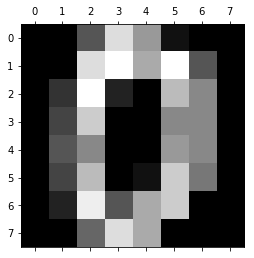

In [20]:
    from sklearn.datasets import load_digits
    digits = load_digits()
    print(digits.data.shape)
    import matplotlib.pyplot as plt 
    plt.gray() 
    plt.matshow(digits.images[0]) 
    plt.show() 